# # FSM: UNSUPERVISED LEARNING

Implementation of  K-Means Clustering and Principal Component Analysis algorithms from scratch in Python using Numpy and Pandas and Matplotlib for visualization.

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Initially implementing K-Means Clustering Algorithm
def kmeans_clustering(dataset, k):
    
    # Initializing centroids on a random basis
    centroids = dataset[np.random.choice(range(dataset.shape[0]), k, replace=False)]
    
    # Assigning each data point the nearest centroid
    distances = np.linalg.norm(dataset[:, np.newaxis] - centroids, axis=2)
    cluster_labels = np.argmin(distances, axis=1)
    
    while True:
        # Update centroids
        new_centroids = np.array([dataset[cluster_labels == i].mean(axis=0) for i in range(k)])
        
        # Assigning each data point the nearest centroid
        new_distances = np.linalg.norm(dataset[:, np.newaxis] - new_centroids, axis=2)
        new_cluster_labels = np.argmin(new_distances, axis=1)
        
        if np.array_equal(cluster_labels, new_cluster_labels):
            break
        
        cluster_labels = new_cluster_labels
        centroids = new_centroids
    
    return cluster_labels

In [3]:
# Implementing Principal Component Analysis (PCA) Algorithm
def pca(dataset):
    
    # Center the data
    centered_data = dataset - np.mean(dataset, axis=0)
    
    # Compute covariance matrix
    covariance_matrix = np.cov(centered_data.T)
    
    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # Transform the data into the new coordinate system
    transformed_data = np.dot(centered_data, eigenvectors)
    
    return transformed_data, eigenvalues

In [4]:
# Loading the Iris dataset
data = pd.read_csv("Iris Dataset.csv")

# Dropping the Species column
data = data.drop("Species", axis=1)

# Extracting the features and the species column for future comparison
features = data.values
species = data.index.values


# K-Means Clustering
k = 3  # Number of clusters
cluster_labels = kmeans_clustering(features, k)

# Principal Component Analysis
transformed_data, eigenvalues = pca(features)

# Print the eigenvalues
print("Eigenvalues:", eigenvalues[:2])

Eigenvalues: [1.89078098e+03 9.73286632e-01]


Data Visualization- Plotting the cluster and actual species

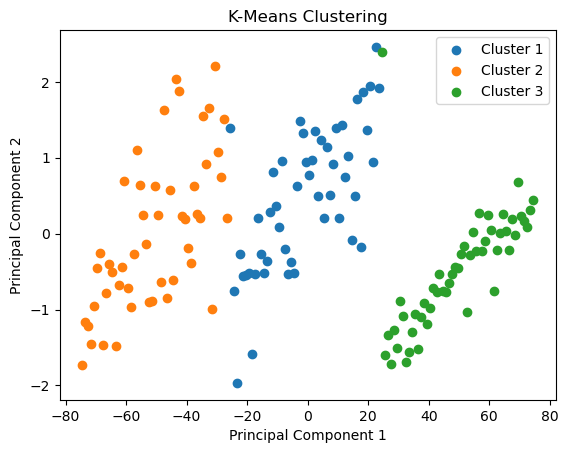

In [10]:
cluster_names = ['Cluster 1', 'Cluster 2', 'Cluster 3']

# K-Means Clustering output
for i in range(k):
    plt.scatter(transformed_data[cluster_labels == i, 0], transformed_data[cluster_labels == i, 1],
                label=cluster_names[i])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


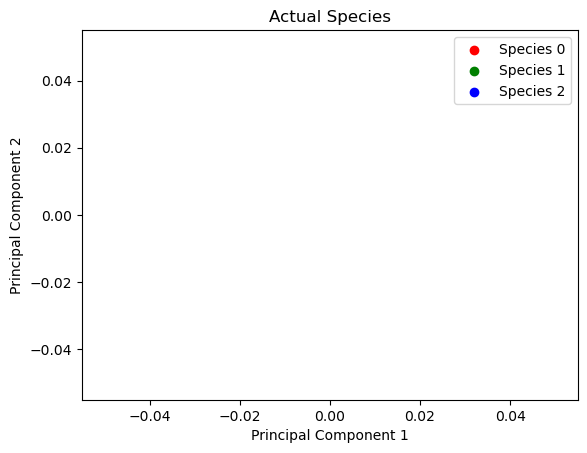

In [20]:
# Plotting the actual species
species_mapping = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
species_labels = np.array([species_mapping.get(s, -1) for s in species])
species_colors = ['red', 'green', 'blue']
for i in range(3):
    plt.scatter(transformed_data[species_labels == i, 0], transformed_data[species_labels == i, 1],
                c=species_colors[i], label=f'Species {i}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Actual Species')
plt.legend()
plt.show()